## Importing modules

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import math
import requests
import io

# Q1

### Importing Dataset

In [2]:
url = "https://raw.githubusercontent.com/Sankalp2002/IML_datasets/main/exam.csv"
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))
print(df)
#dividing into training and testing parts
df_test=df.iloc[70:100]
df_train=df.iloc[0:70]

        test1      test2  label
0   34.623660  78.024693      0
1   30.286711  43.894998      0
2   35.847409  72.902198      0
3   60.182599  86.308552      1
4   79.032736  75.344376      1
..        ...        ...    ...
95  83.489163  48.380286      1
96  42.261701  87.103851      1
97  99.315009  68.775409      1
98  55.340018  64.931938      1
99  74.775893  89.529813      1

[100 rows x 3 columns]


### Dataset Visualisation

Text(0.5, 1.0, 'Test dataset scatter plot')

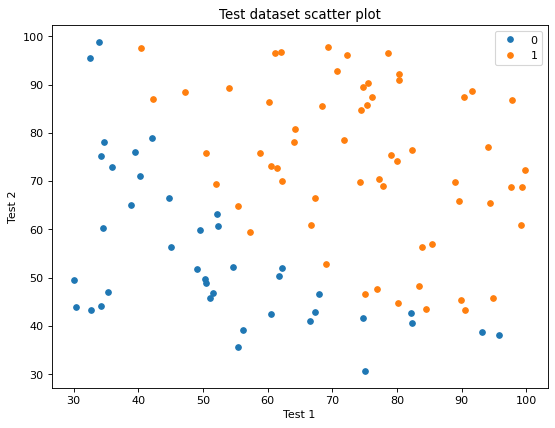

In [3]:
plt.figure(figsize=(8, 6), dpi=80)
groups = df.groupby('label')
for name, group in groups:
    plt.plot(group['test1'], group['test2'], marker='o', linestyle='', markersize=5, label=name)
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend()
plt.title('Test dataset scatter plot')

### Scale function takes list and returns the mean scaled list

In [4]:
def scale(A):
    _mean=np.mean(A)
    _max=max(A)
    _min=min(A)
    scaled=[((i - _mean) / (_max - _min)) for i in A]
    return scaled

### Sigmoid function 

In [5]:
def sig(x):
    if x >= 0:
        z = math.exp(-x)
        s = 1 / (1 + z)
        return s
    else:
        z = math.exp(x)
        s = z / (1 + z)
        return s

### Creating a scaled and a non-scaled list for combined features and a list for labels for both training and testing parts.

In [6]:
y = (list(df_train.iloc[:,0]))
x0 = [1]*len(y)
x1 = scale(list(df_train.iloc[:,0]))
x2 = scale(list(df_train.iloc[:,1]))
scaled_FTrain=list(zip(x0,x1,x2))
PTrain=y
y = (list(df_test.iloc[:,0]))
x0 = [1]*len(y)
x1 = scale(list(df_test.iloc[:,0]))
x2 = scale(list(df_test.iloc[:,1]))
PTest =y
scaled_FTest=list(zip(x0,x1,x2))

y = (list(df_train.iloc[:,2]))
x0 = [1]*len(y)
x1 = (list(df_train.iloc[:,0]))
x2 = (list(df_train.iloc[:,1]))
FTrain=list(zip(x0,x1,x2))
PTrain=y
y = (list(df_test.iloc[:,2]))
x0 = [1]*len(y)
x1 = (list(df_test.iloc[:,0]))
x2 = (list(df_test.iloc[:,1]))
PTest=y
FTest=list(zip(x0,x1,x2))


### Creating a scaled and higher order list for combined features and a list for labels for both training and testing parts. The highest order term is of the order of 4.

In [7]:
y = (list(df_train.iloc[:,2]))
x0 = [1]*len(y)
x1 = (list(df_train.iloc[:,0]))
x2 = (list(df_train.iloc[:,1]))
x3 = scale(np.square(x1))
x4 = scale(np.square(x2))
x5 = scale([x1[i] * x2[i] for i in range(len(x1))])
x6 = scale([i**3 for i in x1])
x7 = scale([i**3 for i in x2])
x8 = scale([i**4 for i in x1])
x9 = scale([i**4 for i in x2])
x1=scale(x1)
x2=scale(x2)
HOFTrain=list(zip(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9))
HOPTrain=y
y = (list(df_test.iloc[:,2]))
x0 = [1]*len(y)
x1 = (list(df_test.iloc[:,0]))
x2 = (list(df_test.iloc[:,1]))
x3 = scale(np.square(x1))
x4 = scale(np.square(x2))
x5 = scale([x1[i] * x2[i] for i in range(len(x1))])
x6 = scale([i**3 for i in x1])
x7 = scale([i**3 for i in x2])
x8 = scale([i**4 for i in x1])
x9 = scale([i**4 for i in x2])
x1=scale(x1)
x2=scale(x2)
HOPTest=y
HOFTest=list(zip(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9))

## Creating separate slope functions for batch, stochastic and mini-batch gradient descent.

### Slopebgd calculates slope for all samples for the gradient descent part.
### Slopesgd calculates slope for a single sample at a given index. 
### Slopembgd calculates slope for a batch of samples starting at a given index till a given batch size.

In [8]:
def Slopebgd(C, F, P, ind):
    Error = 0
    for i in range(len(F)):
        h = 0
        for j in range(len(C)):
            h = h + C[j] * F[i][j]
        Error += (sig(h) - P[i]) * F[i][ind]
    return Error
def Slopembgd(C, F, P, ind,bsize,k):
    Error = 0
    for i in range(k,k+bsize):
        h = 0
        for j in range(len(C)):
            h = h + C[j] * F[i][j]
        Error += (sig(h) - P[i]) * F[i][ind]
    return Error
def Slopesgd(C,F,P,ind,i):
    h = 0
    for j in range(len(C)):
        h = h + C[j] * F[i][j]
    return (sig(h) - P[i]) * F[i][ind]

## Creating an error function which returns error % for given coefficients and feature, label list.

In [9]:
def CalcError(F2,P2,Coeff):
    Error = 0
    for i in range(len(F2)):
        predicted = 0
        for j in range(len(Coeff)):
            predicted = predicted + Coeff[j] * F2[i][j]
        if ((sig(predicted)>=0.5) and (P2[i]==0)) or ((sig(predicted)<0.5) and (P2[i]==1)):
            Error=Error+1
    Error = (Error / len(F2)) * 100
    return Error

## Predictor function

In [866]:
def Predict(score1,score2):
    clen=np.shape(FTrain)[1]
    Coeff = [0]*clen
    for i in range(100000):#50000
        Temp= Coeff
        for j in range(len(Coeff)):
            Temp[j] = Temp[j] - ((0.01 / len(FTrain)) * (Slopebgd(Coeff, FTrain, PTrain, j)))
        Coeff = Temp
    F=[1,score1,score2]
    predicted = 0
    for j in range(len(Coeff)):
        predicted = predicted + Coeff[j] * F[j]
    if (sig(predicted)>=0.5):
        return 1
    else:
        return 0
Predict(45,85)

1

## Functions for Batch Gradient Descent with and without regularization.
### Takes training and testing features and label lists, learning rate, no. of iterations as input and returns error%.
### Regularized BGD takes lambda as input also.

In [11]:
def bgd(F1,P1,F2,P2,rate,iters):
    clen=np.shape(F1)[1]
    Coeff = [0]*clen
    for i in range(iters):#50000
        Temp= Coeff
        for j in range(len(Coeff)):
            Temp[j] = Temp[j] - ((rate / len(F1)) * (Slopebgd(Coeff, F1, P1, j)))
        Coeff = Temp
    #print(Coeff)
    return CalcError(F2,P2,Coeff)

def bgd_reg(F1,P1,F2,P2,rate,iters,lam):
    clen=np.shape(F1)[1]
    Coeff = [0]*clen
    for i in range(iters):#50000
        Temp = Coeff
        for j in range(len(Coeff)):
            Temp[j] = Temp[j]*(1-rate*lam/len(F1)) - ((rate / len(F1)) * (Slopebgd(Coeff, F1, P1, j)))
        Coeff = Temp
    return CalcError(F2,P2,Coeff)

## Functions for Stochastic Gradient Descent with and without regularization.
### Takes training and testing features and label lists, learning rate, no. of iterations as input and returns error%.
### Regularized SGD takes lambda as input also.

In [12]:
def sgd(F1,P1,F2,P2,rate,iters):
    clen=np.shape(F1)[1]
    Coeff = [0]*clen
    for k in range(iters):#1000000
        i=random.randint(0,69)# sample is randomly selected
        Temp = Coeff
        for j in range(len(Coeff)):
            Temp[j] = Temp[j] - ((rate/len(F1)) * (Slopesgd(Coeff, F1, P1, j,i)))
        Coeff = Temp
    return CalcError(F2,P2,Coeff)

def sgd_reg(F1,P1,F2,P2,rate,iters,lam):
    clen=np.shape(F1)[1]
    Coeff = [0]*clen
    for iter in range(iters):#1000000
        i=random.randint(0,69)
        Temp = Coeff
        for j in range(len(Coeff)):
            Temp[j] = Temp[j] - ((rate/len(F1)) * (Slopesgd(Coeff, F1, P1, j,i)+(lam*Temp[j])))
        Coeff = Temp
    return CalcError(F2,P2,Coeff)

## Functions for Mini-Batch Gradient Descent with and without regularization.
### Takes training and testing features and label lists, learning rate,batch size, no. of iterations as input and returns error%.
### Regularized MBGD takes lambda as input also.

In [13]:
def mbgd(F1,P1,F2,P2,rate,bsize,iters):
    clen=np.shape(F1)[1]
    Coeff = [0]*clen
    NoOfBatches = math.floor(len(P1) / bsize)
    for e in range(iters):
        batch = random.randrange(0,NoOfBatches)
        Temp = Coeff
        for j in range(len(Coeff)):
            Temp[j] = Temp[j] - ((rate / len(F1)) * (Slopembgd(Coeff, F1, P1, j,bsize,bsize*batch)))
        Coeff = Temp
    return CalcError(F2,P2,Coeff)

def mbgd_reg(F1,P1,F2,P2,rate,bsize,iters,lam):
    clen=np.shape(F1)[1]
    Coeff = [0]*clen
    NoOfBatches = math.floor(len(P1) / bsize)
    for e in range(iters):
        batch = random.randrange(0,NoOfBatches)#starting point of batch is randomly selected
        Temp = Coeff
        for j in range(len(Coeff)):
            Temp[j] = Temp[j] - ((rate / len(F1)) * (Slopembgd(Coeff, F1, P1, j,bsize,bsize*batch)+(lam*Temp[j])))
        Coeff = Temp  
    return CalcError(F2,P2,Coeff)

## Part A
### No feature scaling, No higher order terms

In [859]:
print(bgd(FTrain,PTrain,FTest,PTest,0.01,100000)) 
    
print(sgd(FTrain,PTrain,FTest,PTest,0.00001,10000))

print(mbgd(FTrain,PTrain,FTest,PTest,0.000001,15,100)) 

6.666666666666667
20.0
20.0


### With feature scaling, No higher order terms

In [691]:
print(bgd(scaled_FTrain,PTrain,scaled_FTest,PTest,0.00000000000000001,400))
    
print(sgd(scaled_FTrain,PTrain,scaled_FTest,PTest,0.000000000000001,300))

print(mbgd(scaled_FTrain,PTrain,scaled_FTest,PTest,0.0001,15,1000))

6.666666666666667
6.666666666666667
10.0


## Part B
### With feature scaling, with higher order terms, without regularisation

In [692]:
print(bgd(HOFTrain,HOPTrain,HOFTest,HOPTest,0.00000000000000001,60))
    
print(sgd(HOFTrain,HOPTrain,HOFTest,HOPTest,0.00000000000000001,3000))

print(mbgd(HOFTrain,HOPTrain,HOFTest,HOPTest,0.000000000000000001,5,6000))

10.0
6.666666666666667
6.666666666666667


## Part C
### With feature scaling, with higher order terms, with regularization.

In [693]:
print(bgd_reg(HOFTrain,HOPTrain,HOFTest,HOPTest,0.000000000000001,1,1))

print(sgd_reg(HOFTrain,HOPTrain,HOFTest,HOPTest,0.0000000000000001,500,1))

print(mbgd_reg(HOFTrain,HOPTrain,HOFTest,HOPTest,0.0000000000000001,10,50,2))

10.0
16.666666666666664
13.333333333333334


# Q2

### Imports

In [881]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [861]:
url = "https://raw.githubusercontent.com/Sankalp2002/IML_datasets/main/heart_disease.csv"
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))
print(df)
#dividing into training and testing parts
df_test=df.iloc[212:303]
df_train=df.iloc[0:212]

      age  sex  cptype  restbp   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0     1.0   145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0     4.0   160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0     4.0   120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0     3.0   130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0     2.0   130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...     ...     ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0     1.0   110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0     4.0   144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0     4.0   130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0     2.0   130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0     3.0   138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca  thal  label  
0      3

### Using T-SNE to visualise the Heart Disease dataset in 2D

Text(0.5, 1.0, 'Using T-SNE to visualise the Heart Disease dataset in 2D')

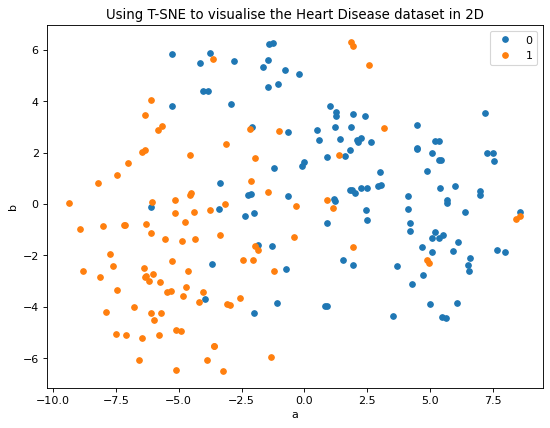

In [863]:
y_train=df_train.iloc[:,13]
X_train=df_train.drop(['label'], axis=1)
y_test=df_test.iloc[:,13]
X_test=df_test.drop(['label'], axis=1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

tsne = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_result = tsne.fit_transform(X_train) 

X_train0=tsne_result[:,0]
X_train1=tsne_result[:,1]
tsne_train=list(zip(list(X_train0),list(X_train1),list(y_train)))
tsne_train=pd.DataFrame (tsne_train, columns = ['a','b','c'])

tsne_testset=tsne.fit_transform(X_test) 

plt.figure(figsize=(8, 6), dpi=80)
groups = tsne_train.groupby('c')
for name, group in groups:
    plt.plot(group['a'], group['b'], marker='o', linestyle='', markersize=5,label=name)
plt.xlabel('a')
plt.ylabel('b')
plt.legend()
plt.title('Using T-SNE to visualise the Heart Disease dataset in 2D')

### Performing PCA on data to reduce to 4 dimensions

In [864]:
y_train=df_train.iloc[:,13]
X_train=df_train.drop(['label'], axis=1)
y_test=df_test.iloc[:,13]
X_test=df_test.drop(['label'], axis=1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

pca = PCA(n_components=4)
pca_result = pca.fit_transform(X_train,y_train)

X_train0=pca_result[:,0]
X_train1=pca_result[:,1]
X_train2=pca_result[:,2]
X_train3=pca_result[:,3]
pca_train=list(zip(list(X_train0),list(X_train1),list(X_train2),list(X_train3)))
# pca_train=pd.DataFrame (pca_train, columns = ['a','b','c','d','e'])
pca_testset=pca.fit_transform(X_test) 

## Performing batch gradient descent which prints error %

In [877]:
bgd(pca_train,list(y_train),list(pca_testset),list(y_test),0.001,10000)

17.582417582417584

## Classifier that returns predicted labels list

In [878]:
def classifier(F1,P1,F2,P2,rate,iters):
    clen=np.shape(F1)[1]
    Coeff = [0]*clen
    for i in range(iters):#50000
        Temp= Coeff
        for j in range(len(Coeff)):
            Temp[j] = Temp[j] - ((rate / len(F1)) * (Slopebgd(Coeff, F1, P1, j)))
        Coeff = Temp
    pred_list = []
    for i in range(len(F2)):
        predicted = 0
        for j in range(len(Coeff)):
            predicted = predicted + Coeff[j] * F2[i][j]
        if (sig(predicted)>=0.5):
            pred_list.append(1)
        else:
            pred_list.append(0)
    return pred_list

### Displaying Confusion matrix

In [879]:
pred_list=classifier(pca_train,list(y_train),list(pca_testset),list(y_test),0.01,100000)
con_mat=confusion_matrix(list(y_test),pred_list)
print(con_mat)

[[41  7]
 [10 33]]


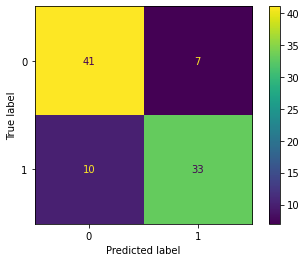

In [882]:
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat)
disp.plot()
plt.show()